# Библиотеки

In [37]:
from zlib import crc32

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
import scipy.stats as st
import re
import warnings
warnings.filterwarnings("ignore")

# Код генерации выборки

In [38]:
EMAIL_REGEX = re.compile(r"[^@]+@phystech.edu")

def generate_dataset(code):
    rs = np.random.RandomState(code)
    x = np.linspace(0, 10, 100)
    return rs.randint(1,3)*x + 3*np.sin(0.5*rs.randint(10, 20)*x/np.pi) + 0.5*rs.randn(len(x))

# Генерация выборки для вашей почты

<span style="color:red">
    ВАЖНО!
    Почта, которую укажете ниже и почта с которой Вы отправляете домашнее задание должна совпадать!
    В момент проверки задания алгоритм генерирует выборку на основе почты из анкеты!
</span>

Внимательно проверьте почту для которой выполняется задание!

In [3]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
assert EMAIL_REGEX.match(task['mail']), 'Not a mail in the phystech.edu domain'
task['id'] = crc32(task['mail'].encode('utf-8'))
task['data'] = generate_dataset(task['id'])

task

Enter your mail: bogdanov.ai@phystech.edu


{'mail': 'bogdanov.ai@phystech.edu',
 'id': 1162440694,
 'data': array([ 0.0884825 ,  0.45664975,  2.01884317,  2.64770156,  4.73348357,
         4.49709193,  4.34728657,  4.41838963,  3.88602441,  3.23626511,
         3.11461177,  0.98306086,  1.88500222,  1.66612019, -0.46332985,
        -0.14747053, -0.27711779, -0.24140133,  0.68829446,  1.39788238,
         3.23160399,  3.03767965,  5.08874189,  5.15614474,  7.20998841,
         7.76160804,  8.85322541,  8.27973223,  8.57414972,  8.66359266,
         7.98023824,  8.68759202,  6.9959785 ,  5.93887394,  6.0347379 ,
         5.40119013,  4.81675411,  4.88270466,  4.94904208,  4.93712636,
         6.38258605,  7.18175912,  7.54577035,  8.24361624,  8.92985651,
        10.42153772, 11.67354187, 12.50014978, 12.54793692, 13.24284485,
        12.91834894, 12.98427734, 11.8439153 , 11.12263502, 11.23826551,
        10.792579  ,  9.40437345,  9.74034182,  9.07282815,  8.92750987,
         9.19940722,  9.73375336,  9.58754133,  9.96231816, 

# Работа с выборкой

In [39]:
data = task['data']
data = pd.DataFrame(data)

## Найдите период временного ряда

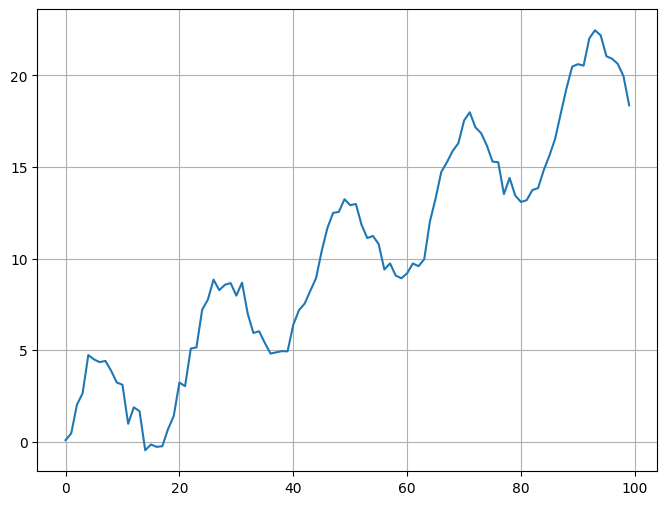

In [40]:
plt.figure(figsize = (8,6))
plt.plot(data)
plt.grid()
plt.show()

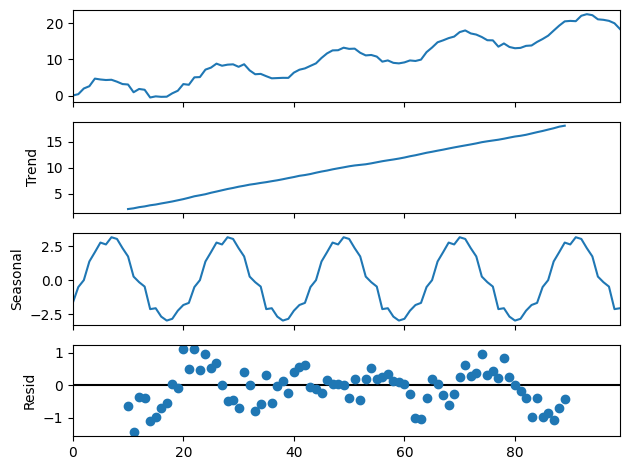

In [54]:
stl_data = seasonal_decompose(data, period=21)
stl_data.plot()
plt.show()

Период: 21.

## Значение статистики KPSS для остатков в разложение seaconal_decompose где период указан с предыдущего пункта.

In [44]:
r = stl_data.resid.dropna()
print(f"Статистика: {kpss(r, nlags='legacy')[0]:.3f}")

Статистика: 0.096
